In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [5]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [6]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

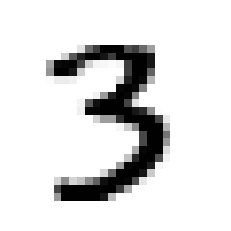

In [12]:
plt.imshow(X_train_full[10000],cmap='binary')
plt.axis("off")
plt.show()

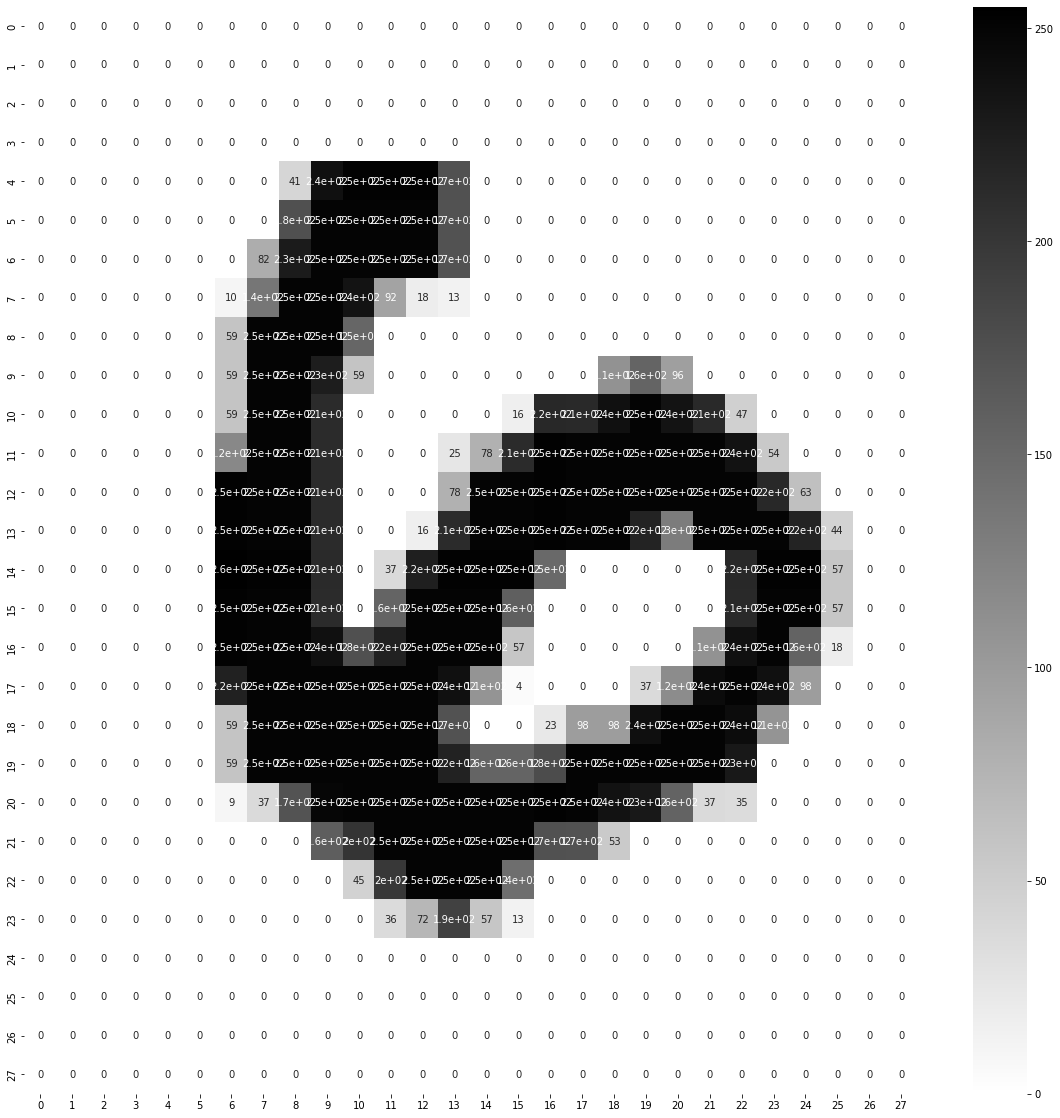

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[9000],annot=True,cmap="binary")

In [16]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
# scale the test set as well
X_test = X_test / 255.

In [18]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)


(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


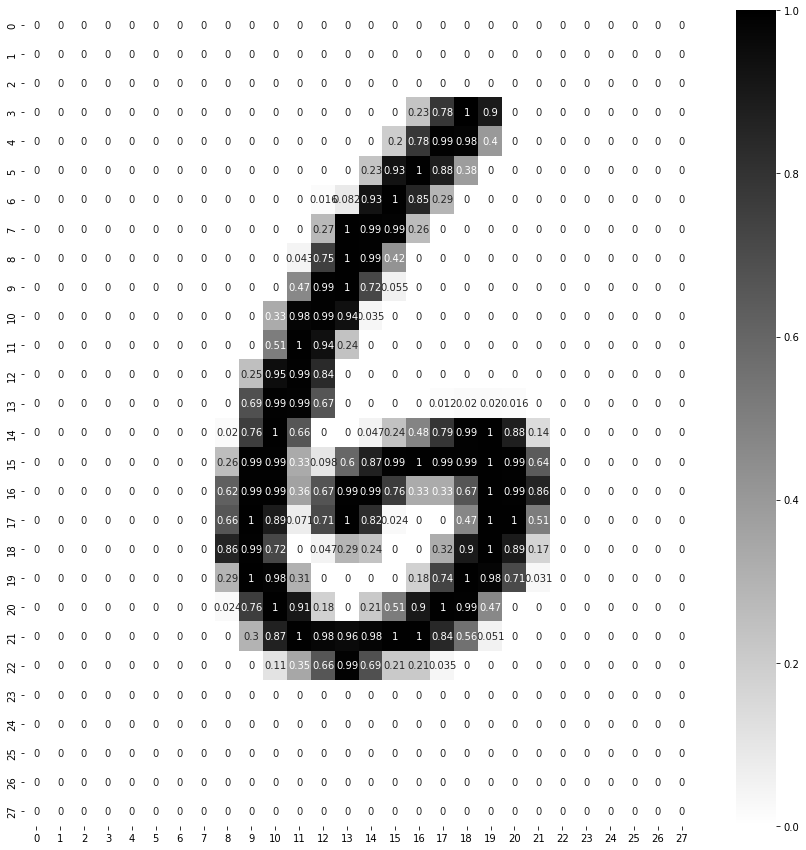

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1000],annot=True,cmap="binary")

In [21]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

In [22]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [23]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=["accuracy"]

In [26]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [29]:
model_clf.layers[1].name

'hiddenlayer1'

In [31]:
hidden1=model_clf.layers[1]

In [33]:
weights,biases=hidden1.get_weights()

In [35]:
55000/32

1718.75

In [34]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 3ms/step - loss: 0.2192 - accuracy: 0.9339 - val_loss: 0.1158 - val_accuracy: 0.9660
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9740 - val_loss: 0.0844 - val_accuracy: 0.9758
Epoch 3/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9803 - val_loss: 0.0732 - val_accuracy: 0.9774
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.0884 - val_accuracy: 0.9738
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0711 - val_accuracy: 0.9800


In [40]:
import time 
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName) 
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

  



In [41]:
model_clf.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2023_01_22_10_59_59_.h5


In [42]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [44]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.219157,0.933945,0.115808,0.9660
1,0.086042,0.974018,0.084393,0.9758
2,0.060955,0.980291,0.073213,0.9774
3,0.041691,0.986709,0.088411,0.9738
4,0.033321,0.989382,0.071145,0.9800


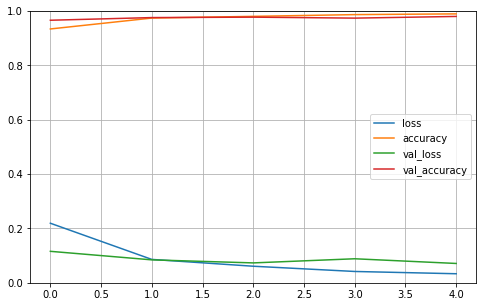

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [65]:
model_clf.evaluate(X_test,y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9767


0.9767000079154968

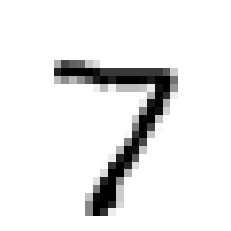

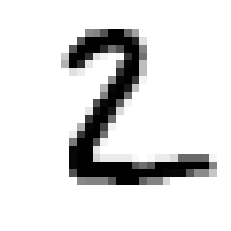

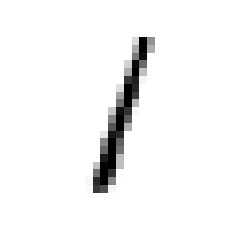

In [54]:
for i in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()


In [55]:
prediction=model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 15ms/step


In [56]:
prediction

array([[1.5712156e-11, 3.2250725e-07, 1.3399878e-07, 5.9835878e-07,
        1.9119368e-09, 1.1688328e-09, 7.6079727e-14, 9.9999857e-01,
        7.3059079e-09, 3.4830333e-07],
       [4.2223512e-14, 4.2435655e-08, 1.0000000e+00, 1.3242778e-10,
        2.0914447e-13, 3.4231471e-15, 8.9540014e-15, 8.6065085e-16,
        5.4733568e-11, 3.4164059e-13],
       [1.3237576e-06, 9.9926108e-01, 1.2414756e-06, 2.4600706e-06,
        2.4581130e-04, 7.8345156e-06, 1.9230753e-04, 2.0784133e-05,
        2.6632249e-04, 8.1482580e-07]], dtype=float32)

In [59]:
y_prob=prediction[0]

In [62]:
np.argmax(y_prob.round(5))

7

In [63]:
y_prob=prediction[1]

In [64]:
np.argmax(y_prob)

2

In [ ]:
model_clf.predict(X_test)

In [ ]:
from tf.keras.models import load_model
model=load_model("/content/SAVED_MODELS/Model_2023_01_22_10_59_59_.h5")